169017344/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


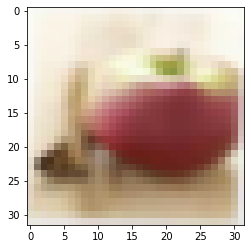

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout
(X_train, y_train),(X_test,y_test) = cifar100.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
plt.imshow(X_train[2])

In [ ]:
X_train = X_train.reshape(50000,3072)
X_test = X_test.reshape(10000,3072)
X_train_scale = X_train.astype('float32')
X_test_scale = X_test.astype('float32')
X_train_scale /=255
X_test_scale /=255
y_train_scale = to_categorical(y_train,100)
y_test_scale = to_categorical(y_test,100)
#print(X_train_scale)
#print(X_test_scale)
#print(y_train_scale)
#print(y_test_scale)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               5

In [ ]:
history = model.fit(X_train_scale,y_train_scale,batch_size=128,epochs=200,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=80)])


Epoch 1/200
313/313 [==============================] - 5s 7ms/step - loss: 4.3633 - accuracy: 0.0389 - val_loss: 4.2508 - val_accuracy: 0.0506
Epoch 2/200
313/313 [==============================] - 2s 5ms/step - loss: 4.0671 - accuracy: 0.0727 - val_loss: 3.9238 - val_accuracy: 0.1032
Epoch 3/200
313/313 [==============================] - 2s 5ms/step - loss: 3.9265 - accuracy: 0.0920 - val_loss: 3.8168 - val_accuracy: 0.1147
Epoch 4/200
313/313 [==============================] - 2s 5ms/step - loss: 3.8338 - accuracy: 0.1093 - val_loss: 3.7180 - val_accuracy: 0.1353
Epoch 5/200
313/313 [==============================] - 2s 5ms/step - loss: 3.7585 - accuracy: 0.1201 - val_loss: 3.6946 - val_accuracy: 0.1442
Epoch 6/200
313/313 [==============================] - 2s 5ms/step - loss: 3.7195 - accuracy: 0.1271 - val_loss: 3.8177 - val_accuracy: 0.1231
Epoch 7/200
313/313 [==============================] - 2s 5ms/step - loss: 3.6725 - accuracy: 0.1365 - val_loss: 3.6422 - val_accuracy: 0.1551

In [ ]:
score = model.evaluate(X_test_scale,y_test_scale,verbose=1)
print('test loss: ',score[0])
print( 'test accuracy: ',score[1])

313/313 [==============================] - 1s 2ms/step - loss: 3.5454 - accuracy: 0.1743
test loss:  3.545367479324341
test accuracy:  0.17430000007152557


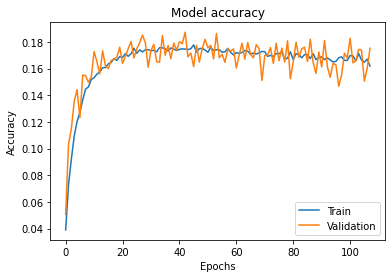

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show()


In [ ]:
prediction = model.predict(X_test_scale[:1])
print(prediction)

[[3.74775880e-07 2.26173725e-05 5.82127192e-04 1.79476640e-03
  1.15242158e-03 4.94951056e-03 3.34794604e-05 2.70454511e-05
  6.02481216e-02 8.74988455e-03 1.11104091e-04 6.02987595e-04
  1.75557658e-01 5.82763460e-03 7.36350057e-06 3.32498574e-03
  1.53249153e-03 4.53547463e-02 3.73022136e-04 1.44479494e-03
  1.98752445e-04 1.93179375e-03 8.15280655e-04 4.25047763e-02
  1.41449069e-04 3.85783473e-03 1.14308430e-04 4.26168181e-03
  7.06727558e-04 5.96789527e-04 6.26167469e-03 3.37641896e-03
  1.08631542e-02 1.44484388e-02 9.51043476e-05 9.24674852e-04
  4.10590292e-05 3.90289463e-02 5.52049605e-04 1.57605335e-02
  3.56035098e-03 2.50874582e-04 6.81763049e-04 1.63240256e-05
  5.85746893e-04 2.58346437e-04 2.02589692e-03 1.79088267e-04
  4.76706680e-03 3.91056240e-02 1.85501616e-04 8.96736383e-05
  5.13403866e-05 3.23766369e-09 2.27149154e-04 5.53313317e-03
  5.65669779e-03 2.01343864e-05 3.10148927e-03 1.14552779e-02
  2.98024379e-02 1.60362601e-04 6.89173760e-07 5.07388650e-05
  5.0096